### IOWA State analysis
<br>
In this notebook I will analyze the state of Iowa in terms of population, gdp, gdp per capita and unemployment rate on the year-to-year basis. I will take a look at the data mainly from 2005-2020/22 period. The population data on the State level and gdp/population data on County level gathered contains observations for period 2005-2020.
The State of Iowa is 26th largest State in the United States, located in the central part of the country has the total area of 56,272.8 squared miles. In terms of population and gdp State ranks 31th and 30th respectively in the country with 3,193,079 people living in the State (2021) and gdp for 2022 equal to 231651.3 million USD. The capital city of the State is Des Moines. The neighbours are: Wisconsin and Illinois from the east, Minnesota from the north, South Dakota and Nebraska from the west and Missouri from the south.

### Data
The links to the sources of the data can be found below: 
<br>
https://www.wikipedia.org/ <br>
https://data.iowa.gov/ <br>
https://www.bea.gov/data/gdp/gdp-county-metro-and-other-areas <br>
https://fred.stlouisfed.org
            

### Goals <br>
 The main goal of the analysis is to answer the following quesions:
 <br>
 1. How did the Iowa's economy and population change over the years?<br>
 2. How fast was the change of the State gdp, population and median household income?<br>
 3. Which County experienced the fastest population change?<br>
 4. How many counties expirienced population growth and how many expirienced gdp growth?<br>
 5. Which County experienced the fastest gdp change?<br>
 6. What was the gdp per capita growth in the analyzed period? <br>
 7. Which County experienced the highest gdp per capita growth? <br>
 8. What was the unemployement rate change in the State over the years?<br>
 9. Which County experienced highest population growth?

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr





In [263]:
df_pop_county = pd.read_csv('Iowa1.csv')
df_gdp_county = pd.read_csv('Iowa3.csv')
df_gdp_state = pd.read_csv('Iowa4.csv')
df_labor_force = pd.read_csv('Iowa8.csv')
df_household_income = pd.read_csv('hhold_income.csv')
df_house_idx = pd.read_csv('house_price_index.csv')




The datasets and libraries are loaded, let's examine the data.

In [264]:
df_pop_county.head()

,FIPS,County,Year,Population,Primary Point
0,19169,Story County,July 01 2011,91136,POINT (-93.4650448 42.0362415)
1,19065,Fayette County,July 01 1995,22129,POINT (-91.8443207 42.8625919)
2,19089,Howard County,July 01 2002,9794,POINT (-92.3171989 43.3567673)
3,19007,Appanoose County,July 01 1999,13761,POINT (-92.8686104 40.7431635)
4,19043,Clayton County,July 01 2012,17946,POINT (-91.34143280000002 42.8447493)


The above dataset contains population data per each County in Iowa from 1990 till 2019. Dataset contains also a column FIPS and Primary Point which wont be useful in this analysis.

In [265]:
df_gdp_county.head()
 

,GeoFips,GeoName,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,19000,Iowa,94837806.0,98557027.0,105123259.0,117188453.0,123190909.0,127896330.0,137930153.0,137548464.0,...,148477616.0,158538380.0,162200263.0,173095881.0,180299255.0,181011403.0,183549771.0,190403058.0,194322589.0,194267619.0
1,19001,"Adair, IA",192200.0,207074.0,213211.0,264365.0,231854.0,241022.0,238902.0,274102.0,...,293421.0,291755.0,326127.0,320286.0,340599.0,334776.0,345933.0,365573.0,396285.0,471348.0
2,19003,"Adams, IA",104535.0,122224.0,108547.0,133267.0,113445.0,105909.0,106668.0,144128.0,...,233706.0,161946.0,194688.0,226644.0,235122.0,240144.0,238874.0,230534.0,244107.0,225198.0
3,19005,"Allamakee, IA",370163.0,373426.0,404772.0,449149.0,451816.0,461311.0,480689.0,488535.0,...,542350.0,527458.0,576504.0,617226.0,619617.0,647922.0,624054.0,615159.0,643771.0,650482.0
4,19007,"Appanoose, IA",246068.0,262107.0,283193.0,310364.0,313599.0,312934.0,299743.0,337399.0,...,367128.0,355931.0,372061.0,378414.0,404814.0,401151.0,416086.0,414456.0,424582.0,422811.0


The df_gdp_county contains information about gdp per County in usd for each year. This dataset also contain the column called GeoFips which will not be used in this analysis. Dataset contains data for 2001-2020 period.
    
    

In [266]:
df_gdp_state.head()

,DATE,IANQGSP
0,2005-01-01,122230.8
1,2005-04-01,122820.8
2,2005-07-01,124314.5
3,2005-10-01,123397.6
4,2006-01-01,125734.9


The df_gdp_state contains information about total gdp in current usd for the State since 2005 till 2022. For each year there are 4 data inputs: 1st of January, April, July and October. We will stick to one imput per year(January).

In [267]:
df_labor_force.head()

,State FIPS,AREA TYPE,AREA NAME,YEAR,MONTH,SEASONALLY ADJUSTED,LABORFORCE,EMPLOYMENT,UNEMPLOYMENT,UNEMPLOYMENT RATE,LABFORCE_PART RATE
0,19,State,Iowa,2022,July,1,1710600,1667200,43300,2.5,67.8
1,19,State,Iowa,2022,July,0,1712300,1665400,46900,2.7,NaN
2,19,State,Iowa,2022,June,1,1709200,1665400,43900,2.6,67.8
3,19,State,Iowa,2022,June,0,1717500,1671900,45600,2.7,NaN
4,19,State,Iowa,2022,May,1,1704100,1657300,46800,2.7,67.6


The above dataset contains information about unemployement rate and laborforce in the State of Iowa. Period: 2000-2022.

In [268]:
df_household_income.head()

,DATE,MEHOINUSIAA672N
0,1984-01-01,49472
1,1985-01-01,50392
2,1986-01-01,53150
3,1987-01-01,50767
4,1988-01-01,53667


The df_household_income dataset contains data about median household income in Iowa for the years 1984-2021 in USD.

In [269]:
df_house_idx.head()

,DATE,IASTHPI
0,1975-01-01,59.42
1,1975-04-01,63.30
2,1975-07-01,63.54
3,1975-10-01,65.25
4,1976-01-01,67.57


The last dataset contains information about housing price index from 1975 till 2022 in the State of Iowa.

Let's get some overview of the data. Due to the datatypes in certain columns, some of the data cleaning and transformation is required beforehand.

In [270]:
df_house_idx.DATE = [int(x[:4]) for x in df_house_idx.DATE]
df_household_income.DATE = [int(x[:4]) for x in df_household_income.DATE]
df_gdp_state.DATE = [int(x[:4]) for x in df_gdp_state.DATE]

In [271]:
df_house_idx = df_house_idx.rename(columns={'IASTHPI': 'House_price_idx', 'DATE': 'Date'})
df_household_income = df_household_income.rename(columns={'MEHOINUSIAA672N': 'Household_income', 'DATE': 'Date'})
df_gdp_state = df_gdp_state.rename(columns={'IANQGSP': 'Gdp', 'DATE': 'Date'})
df_house_idx.drop_duplicates(subset=['Date'], inplace=True)
df_gdp_state.drop_duplicates(subset=['Date'], inplace=True)

In [272]:
df_house_idx.head()

,Date,House_price_idx
0,1975,59.42
4,1976,67.57
8,1977,76.16
12,1978,85.52
16,1979,96.01


In [273]:
df_house_idx_2005 = df_house_idx[df_house_idx.Date > 2004]

In [274]:
df_household_income.head()

,Date,Household_income
0,1984,49472
1,1985,50392
2,1986,53150
3,1987,50767
4,1988,53667


In [275]:
df_household_2005 = df_household_income[df_household_income.Date > 2004]

In [276]:
df_gdp_state.head()

,Date,Gdp
0,2005,122230.8
4,2006,125734.9
8,2007,134118.7
12,2008,139079.1
16,2009,134576.2


In [277]:
df_gdp_hh_idx = df_gdp_state.merge(df_household_2005, on='Date').merge(df_house_idx_2005, on='Date')

Date column converted to int with yearly values, columns renamed for easier understanding.

In [278]:
df_pop_county.drop(columns=['Primary Point', 'FIPS'], inplace=True)

In [279]:

    df_pop_county_year_list = list(df_pop_county.Year)
    df_pop_cnt_year = [int(i[-4:]) for i in df_pop_county_year_list]
    df_pop_county.Year = df_pop_cnt_year


In [280]:
    df_pop_county = df_pop_county[df_pop_county.Year > 2004]
    df_pop_state = df_pop_county.groupby(['Year']).sum()
    df_pop_state = df_pop_state.reset_index()
    df_pop_state = df_pop_state.rename(columns={'Year': 'Date'})
    df_pop_state

,Date,Population
0,2005,2949450
1,2006,2964391
2,2007,2978719
3,2008,2993987
4,2009,3007856
5,2010,3046355
6,2011,3066336
7,2012,3076190
8,2013,3092997
9,2014,3109350


In [281]:
df_pop_counties_2005 = df_pop_county.where(df_pop_county.Year == 2005)
df_pop_counties_2020 = df_pop_county.where(df_pop_county.Year == 2020)
df_pop_counties_2020 =df_pop_counties_2020.dropna()
df_pop_counties_2005 = df_pop_counties_2005.dropna()



In [282]:
df_pop_diff = pd.merge(df_pop_counties_2005, df_pop_counties_2020, on=['County'])


In [283]:
df_pop_diff['difference'] = df_pop_diff['Population_y'] - df_pop_diff['Population_x']
df_pop_diff = df_pop_diff.rename(columns={'Population_x': 'Population 2005', 'Population_y': 'Population 2020'})

In [284]:
df_pop_diff =df_pop_diff.drop(columns=['Year_x','Year_y'])

In [285]:
df_pop_diff

,County,Population 2005,Population 2020,difference
0,Mitchell County,10784.0,10565.0,-219.0
1,Delaware County,17619.0,17488.0,-131.0
2,Mills County,14846.0,14484.0,-362.0
3,Wayne County,6422.0,6497.0,75.0
4,Benton County,26643.0,25575.0,-1068.0
...,...,...,...,...
94,Adair County,7721.0,7496.0,-225.0
95,Ida County,7169.0,7005.0,-164.0
96,Buena Vista County,19713.0,20823.0,1110.0
97,Guthrie County,11201.0,10623.0,-578.0


In [286]:
def calc_ratio(dataset,column_name,value_2005_col):
    diff_list = list(dataset['difference'])
    pop_list = list(dataset[value_2005_col])
    dataset[column_name] = [int(diff_list[i]) / pop_list[i] * 100 for i in range(0,len(pop_list))]
    dataset['growing'] = dataset['difference'].apply(lambda x: True if x > 0 else False)
    
     

The above function will be used to calculate the % change measured for the whole period.

In [287]:
calc_ratio(df_pop_diff,'Ratio','Population 2005')

The above code created a dataset containing difference in population in the Counties for the 2005-2020 period. I also decided to calculate ratio of change.

In [288]:
df_gdp_county

,GeoFips,GeoName,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,19000,Iowa,94837806.0,98557027.0,105123259.0,117188453.0,123190909.0,127896330.0,137930153.0,137548464.0,...,148477616.0,158538380.0,162200263.0,173095881.0,180299255.0,181011403.0,183549771.0,190403058.0,194322589.0,194267619.0
1,19001,"Adair, IA",192200.0,207074.0,213211.0,264365.0,231854.0,241022.0,238902.0,274102.0,...,293421.0,291755.0,326127.0,320286.0,340599.0,334776.0,345933.0,365573.0,396285.0,471348.0
2,19003,"Adams, IA",104535.0,122224.0,108547.0,133267.0,113445.0,105909.0,106668.0,144128.0,...,233706.0,161946.0,194688.0,226644.0,235122.0,240144.0,238874.0,230534.0,244107.0,225198.0
3,19005,"Allamakee, IA",370163.0,373426.0,404772.0,449149.0,451816.0,461311.0,480689.0,488535.0,...,542350.0,527458.0,576504.0,617226.0,619617.0,647922.0,624054.0,615159.0,643771.0,650482.0
4,19007,"Appanoose, IA",246068.0,262107.0,283193.0,310364.0,313599.0,312934.0,299743.0,337399.0,...,367128.0,355931.0,372061.0,378414.0,404814.0,401151.0,416086.0,414456.0,424582.0,422811.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,19195,"Worth, IA",120305.0,135249.0,137707.0,170576.0,167560.0,288643.0,332509.0,313097.0,...,322970.0,318693.0,445553.0,452251.0,417221.0,350089.0,296084.0,302021.0,308275.0,309318.0
99,19197,"Wright, IA",386827.0,411382.0,427786.0,498349.0,479038.0,491714.0,574332.0,602617.0,...,711419.0,751892.0,760466.0,875451.0,837381.0,671682.0,672548.0,779821.0,671738.0,683910.0
100,Legend / Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Metropolitan Areas are defined (geographically...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
df_labor_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52574 entries, 0 to 52573
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State FIPS           52574 non-null  int64  
 1   AREA TYPE            52574 non-null  object 
 2   AREA NAME            52574 non-null  object 
 3   YEAR                 52574 non-null  int64  
 4   MONTH                52574 non-null  object 
 5   SEASONALLY ADJUSTED  52574 non-null  int64  
 6   LABORFORCE           52574 non-null  int64  
 7   EMPLOYMENT           52574 non-null  int64  
 8   UNEMPLOYMENT         52574 non-null  int64  
 9   UNEMPLOYMENT RATE    52574 non-null  float64
 10  LABFORCE_PART RATE   271 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 4.4+ MB


In [290]:
df_labor_force['AREA NAME'].unique()

array(['Iowa', 'Adair County', 'Adams County', 'Allamakee County',
       'Appanoose County', 'Audubon County', 'Benton County',
       'Black Hawk County', 'Boone County', 'Bremer County',
       'Buchanan County', 'Buena Vista County', 'Butler County',
       'Calhoun County', 'Carroll County', 'Cass County', 'Cedar County',
       'Cerro Gordo County', 'Cherokee County', 'Chickasaw County',
       'Clarke County', 'Clay County', 'Clayton County', 'Clinton County',
       'Crawford County', 'Dallas County', 'Davis County',
       'Decatur County', 'Delaware County', 'Des Moines County',
       'Dickinson County', 'Dubuque County', 'Emmet County',
       'Fayette County', 'Floyd County', 'Franklin County',
       'Fremont County', 'Greene County', 'Grundy County',
       'Guthrie County', 'Hamilton County', 'Hancock County',
       'Hardin County', 'Harrison County', 'Henry County',
       'Howard County', 'Humboldt County', 'Ida County', 'Iowa County',
       'Jackson County', 'Jaspe

In [291]:
df_labor_force.drop(columns=['State FIPS','SEASONALLY ADJUSTED','LABFORCE_PART RATE','MONTH'],inplace=True)

In [292]:
list_area = list(df_labor_force['AREA TYPE'].unique())
list_area = list_area[:2]
list_area

['State', 'County']

In [293]:

df_labor_force = df_labor_force.reset_index().drop(columns=['index'])
df_labor_force = df_labor_force[df_labor_force['AREA TYPE'].isin(list_area)]
df_labor_force

,AREA TYPE,AREA NAME,YEAR,LABORFORCE,EMPLOYMENT,UNEMPLOYMENT,UNEMPLOYMENT RATE
0,State,Iowa,2022,1710600,1667200,43300,2.5
1,State,Iowa,2022,1712300,1665400,46900,2.7
2,State,Iowa,2022,1709200,1665400,43900,2.6
3,State,Iowa,2022,1717500,1671900,45600,2.7
4,State,Iowa,2022,1704100,1657300,46800,2.7
...,...,...,...,...,...,...,...
27400,County,Wright County,2000,7370,7200,170,2.3
27401,County,Wright County,2000,7360,7170,180,2.5
27402,County,Wright County,2000,7410,7190,220,3.0
27403,County,Wright County,2000,7360,7120,240,3.2


In [294]:
df_1 = df_labor_force.groupby(['YEAR', 'AREA NAME'])['LABORFORCE'].mean().to_frame().reset_index()
df_2 = df_labor_force.groupby(['YEAR', 'AREA NAME'])['EMPLOYMENT'].mean().to_frame().reset_index()
df_3 = df_labor_force.groupby(['YEAR', 'AREA NAME'])['UNEMPLOYMENT'].mean().to_frame().reset_index()
df_4 = df_labor_force.groupby(['YEAR', 'AREA NAME'])['UNEMPLOYMENT RATE'].mean().to_frame().reset_index()

In [295]:
df_labor_force = pd.merge(df_1,df_2, on=['YEAR', 'AREA NAME'], how='outer').merge(df_3, on=['YEAR', 'AREA NAME'], how='outer').merge(df_4, on=['YEAR', 'AREA NAME'], how='outer')

df_labor_force
df_labor_force.info()
list_col = list(df_labor_force.columns)
list_col

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 0 to 2299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               2300 non-null   int64  
 1   AREA NAME          2300 non-null   object 
 2   LABORFORCE         2300 non-null   float64
 3   EMPLOYMENT         2300 non-null   float64
 4   UNEMPLOYMENT       2300 non-null   float64
 5   UNEMPLOYMENT RATE  2300 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 125.8+ KB


['YEAR',
 'AREA NAME',
 'LABORFORCE',
 'EMPLOYMENT',
 'UNEMPLOYMENT',
 'UNEMPLOYMENT RATE']

In [296]:
for i in range(len(list_col)):
    if i > 1 and i <5:
        df_labor_force[list_col[i]] = df_labor_force[list_col[i]].apply(np.floor)
    elif i > 4:
        df_labor_force[list_col[i]] = df_labor_force[list_col[i]].round(1)
        


In [297]:
df_labor_force['LABORFORCE'] = df_labor_force['EMPLOYMENT'] + df_labor_force['UNEMPLOYMENT']

In [298]:
df_labor_force['UNEMPLOYMENT RATE'] = (df_labor_force['UNEMPLOYMENT'] / df_labor_force['LABORFORCE'] * 100).round(1)

In [299]:
df_labor_iowa = df_labor_force[df_labor_force['AREA NAME'] == 'Iowa']
df_labor_iowa = df_labor_iowa[df_labor_iowa['YEAR'] > 2004]
df_labor_iowa

,YEAR,AREA NAME,LABORFORCE,EMPLOYMENT,UNEMPLOYMENT,UNEMPLOYMENT RATE
547,2005,Iowa,1628528.0,1558691.0,69837.0,4.3
647,2006,Iowa,1655858.0,1595075.0,60783.0,3.7
747,2007,Iowa,1662233.0,1600629.0,61604.0,3.7
847,2008,Iowa,1682399.0,1612266.0,70133.0,4.2
947,2009,Iowa,1677170.0,1569858.0,107312.0,6.4
1047,2010,Iowa,1674291.0,1571925.0,102366.0,6.1
1147,2011,Iowa,1670087.0,1575854.0,94233.0,5.6
1247,2012,Iowa,1660266.0,1576241.0,84025.0,5.1
1347,2013,Iowa,1676720.0,1597350.0,79370.0,4.7
1447,2014,Iowa,1698874.0,1626854.0,72020.0,4.2


I have decided to stick to year to year data for labor force dataset. I have used average for each value and rounded them to the lower whole numbers. I decided not to include decimals in laborforce employment and unemployment columns because those columns in original dataset represented discrete values(people count), so after extracting mean for each year, I have rounded it using "np.floor". I've also made sure that the calculations after rounding are still accurate.

In [300]:
df_gdp_county.drop(columns=['GeoFips'],inplace=True)

In [301]:
df_gdp_county.isnull().sum().sum()

63

In [302]:
df_gdp_county.tail(3)

,GeoName,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All the missing values from df_gdp_county dataset are in the last 3 rows. Values from all columns are missing so I decided to drop the rows.

In [303]:
df_gdp_county = df_gdp_county.dropna()

In [304]:
df_gdp_county.tail(3)

,GeoName,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
97,"Woodbury, IA",3449063.0,3477251.0,3690258.0,4082678.0,4397495.0,4599696.0,4916320.0,5311774.0,5023740.0,...,4866713.0,4839541.0,4908191.0,5026204.0,5310253.0,5390668.0,5057465.0,5399467.0,5401851.0,5335902.0
98,"Worth, IA",120305.0,135249.0,137707.0,170576.0,167560.0,288643.0,332509.0,313097.0,266955.0,...,322970.0,318693.0,445553.0,452251.0,417221.0,350089.0,296084.0,302021.0,308275.0,309318.0
99,"Wright, IA",386827.0,411382.0,427786.0,498349.0,479038.0,491714.0,574332.0,602617.0,537426.0,...,711419.0,751892.0,760466.0,875451.0,837381.0,671682.0,672548.0,779821.0,671738.0,683910.0


In [305]:
df_gdp_county_melt = pd.melt(frame=df_gdp_county,id_vars='GeoName',value_vars=[str(i) for i in range(2001,2021)],value_name='Gdp',var_name='Date')

In [306]:
df_gdp_county_melt = df_gdp_county_melt.rename(columns={'GeoName': 'County'})

In [307]:
df_gdp_county_melt.Date = [int(i) for i in list(df_gdp_county_melt.Date)]

In [308]:
df_gdp_county_melt = df_gdp_county_melt.where(df_gdp_county_melt.Date > 2004)

In [309]:
df_gdp_county_melt = df_gdp_county_melt.dropna()

In [310]:
df_gdp_county_melt

,County,Date,Gdp
400,Iowa,2005.0,123190909.0
401,"Adair, IA",2005.0,231854.0
402,"Adams, IA",2005.0,113445.0
403,"Allamakee, IA",2005.0,451816.0
404,"Appanoose, IA",2005.0,313599.0
...,...,...,...
1995,"Winnebago, IA",2020.0,441583.0
1996,"Winneshiek, IA",2020.0,1060337.0
1997,"Woodbury, IA",2020.0,5335902.0
1998,"Worth, IA",2020.0,309318.0


In [311]:
df_gdp_county_2005 = df_gdp_county_melt[df_gdp_county_melt.Date == 2005.0]
df_gdp_county_2020 = df_gdp_county_melt[df_gdp_county_melt.Date == 2020.0]

In [312]:
df_gdp_county_diff = pd.merge(df_gdp_county_2005,df_gdp_county_2020,on=['County'])
df_gdp_county_diff

,County,Date_x,Gdp_x,Date_y,Gdp_y
0,Iowa,2005.0,123190909.0,2020.0,194267619.0
1,"Adair, IA",2005.0,231854.0,2020.0,471348.0
2,"Adams, IA",2005.0,113445.0,2020.0,225198.0
3,"Allamakee, IA",2005.0,451816.0,2020.0,650482.0
4,"Appanoose, IA",2005.0,313599.0,2020.0,422811.0
...,...,...,...,...,...
95,"Winnebago, IA",2005.0,327016.0,2020.0,441583.0
96,"Winneshiek, IA",2005.0,686874.0,2020.0,1060337.0
97,"Woodbury, IA",2005.0,4397495.0,2020.0,5335902.0
98,"Worth, IA",2005.0,167560.0,2020.0,309318.0


In [313]:
df_gdp_county_diff = df_gdp_county_diff.rename(columns={'Gdp_x': 'Gdp_2005','Gdp_y': 'Gdp_2020'}).drop(columns=['Date_x','Date_y'])
df_gdp_county_diff = df_gdp_county_diff.drop(index=df_gdp_county_diff.index[0],axis=0)

In [314]:
df_gdp_county_diff['difference'] = df_gdp_county_diff.Gdp_2020 - df_gdp_county_diff.Gdp_2005


In [315]:
df_gdp_county_diff

,County,Gdp_2005,Gdp_2020,difference
1,"Adair, IA",231854.0,471348.0,239494.0
2,"Adams, IA",113445.0,225198.0,111753.0
3,"Allamakee, IA",451816.0,650482.0,198666.0
4,"Appanoose, IA",313599.0,422811.0,109212.0
5,"Audubon, IA",171628.0,304112.0,132484.0
...,...,...,...,...
95,"Winnebago, IA",327016.0,441583.0,114567.0
96,"Winneshiek, IA",686874.0,1060337.0,373463.0
97,"Woodbury, IA",4397495.0,5335902.0,938407.0
98,"Worth, IA",167560.0,309318.0,141758.0


In [316]:
calc_ratio(df_gdp_county_diff,'Ratio','Gdp_2005')

In [317]:
df_gdp_county_diff

,County,Gdp_2005,Gdp_2020,difference,Ratio,growing
1,"Adair, IA",231854.0,471348.0,239494.0,103.295177,True
2,"Adams, IA",113445.0,225198.0,111753.0,98.508528,True
3,"Allamakee, IA",451816.0,650482.0,198666.0,43.970554,True
4,"Appanoose, IA",313599.0,422811.0,109212.0,34.825366,True
5,"Audubon, IA",171628.0,304112.0,132484.0,77.192533,True
...,...,...,...,...,...,...
95,"Winnebago, IA",327016.0,441583.0,114567.0,35.034066,True
96,"Winneshiek, IA",686874.0,1060337.0,373463.0,54.371399,True
97,"Woodbury, IA",4397495.0,5335902.0,938407.0,21.339581,True
98,"Worth, IA",167560.0,309318.0,141758.0,84.601337,True


In [318]:
df_gdp_county_diff.growing.unique()

array([ True])

Thanks to the calc_ratio function and above code, we managed to create 2 similar datasets. One contains the gdp change for each County across the years and the second one contains population change for each County.

In [319]:
df_labor_force.isnull().sum().sum()

0

In [320]:
df_pop_county.isnull().sum().sum()

0

In [321]:
df_gdp_state.isnull().sum().sum()

0

In [322]:
df_house_idx.isnull().sum().sum()

0

In [323]:
df_household_income.isnull().sum().sum()

0

The dasets turned out to not have any empty values. Let's get quick overivew of datasets to check if the basic calculation on numerical data makes sense.

In [324]:
print('1 .pop_county \n',df_pop_county.describe())
print('2. gdp state \n',df_gdp_state.describe())
print('3. household income \n',df_household_income.describe())
print('4. house idx \n',df_house_idx.describe())
print('6. gdp county \n',df_gdp_county.describe())
print('7. labor force \n',df_labor_force.describe())


1 .pop_county 
               Year     Population
count  1584.000000    1584.000000
mean   2012.500000   31043.919823
std       4.611228   54738.246388
min    2005.000000    3602.000000
25%    2008.750000   10157.250000
50%    2012.500000   15503.500000
75%    2016.250000   24847.250000
max    2020.000000  492401.000000
2. gdp state 
               Date            Gdp
count    18.000000      18.000000
mean   2013.500000  165666.311111
std       5.338539   31073.700285
min    2005.000000  122230.800000
25%    2009.250000  139167.950000
50%    2013.500000  163998.450000
75%    2017.750000  186656.950000
max    2022.000000  231651.300000
3. household income 
               Date  Household_income
count    38.000000         38.000000
mean   2002.500000      61773.921053
std      11.113055       6569.540732
min    1984.000000      49472.000000
25%    1993.250000      55935.500000
50%    2002.500000      62623.500000
75%    2011.750000      65876.000000
max    2021.000000      74144.000000
4.

As expected, we didnt have any unexpected errors in the calculations. Before starting visualizing data let's check for the duplicate values.

In [325]:
def check_duplicated(dataset,name):
    print('Duplicates for ' + name)
    dups = dataset[dataset.duplicated()]
    print(dups)
    print('Total: ' + str(dataset.duplicated().sum()))

I have created function to check for duplicates in the dataframes.

In [326]:
check_duplicated(df_gdp_county, 'gdp county')
check_duplicated(df_labor_force, 'labor force')
check_duplicated(df_pop_county, 'pop county')
check_duplicated(df_house_idx, 'house idx')
check_duplicated(df_household_income, 'household income')
check_duplicated(df_gdp_state, 'gdp state')


Duplicates for gdp county
Empty DataFrame
Columns: [GeoName, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Index: []

[0 rows x 21 columns]
Total: 0
Duplicates for labor force
Empty DataFrame
Columns: [YEAR, AREA NAME, LABORFORCE, EMPLOYMENT, UNEMPLOYMENT, UNEMPLOYMENT RATE]
Index: []
Total: 0
Duplicates for pop county
Empty DataFrame
Columns: [County, Year, Population]
Index: []
Total: 0
Duplicates for house idx
Empty DataFrame
Columns: [Date, House_price_idx]
Index: []
Total: 0
Duplicates for household income
Empty DataFrame
Columns: [Date, Household_income]
Index: []
Total: 0
Duplicates for gdp state
Empty DataFrame
Columns: [Date, Gdp]
Index: []
Total: 0


No duplicates across the datasets.

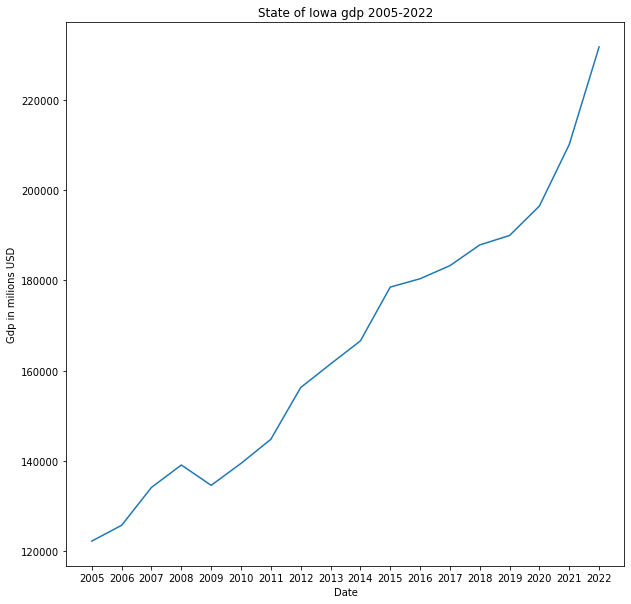

In [327]:
plt.figure(figsize = (10,10))
ax = sns.lineplot(x='Date',y='Gdp', data=df_gdp_state)
ax.set_xticks([i for i in df_gdp_state['Date']])
plt.ylabel('Gdp in milions USD')
plt.title('State of Iowa gdp 2005-2022')
plt.show()

As visible the gdp of the State of Iowa in the last 17 years almost doubled. The 2008 crisis look like minor disturbtion in comparison to the overall growth of the gdp.

Text(0.5, 1.0, 'Laborforce in the State of Iowa - January each year')

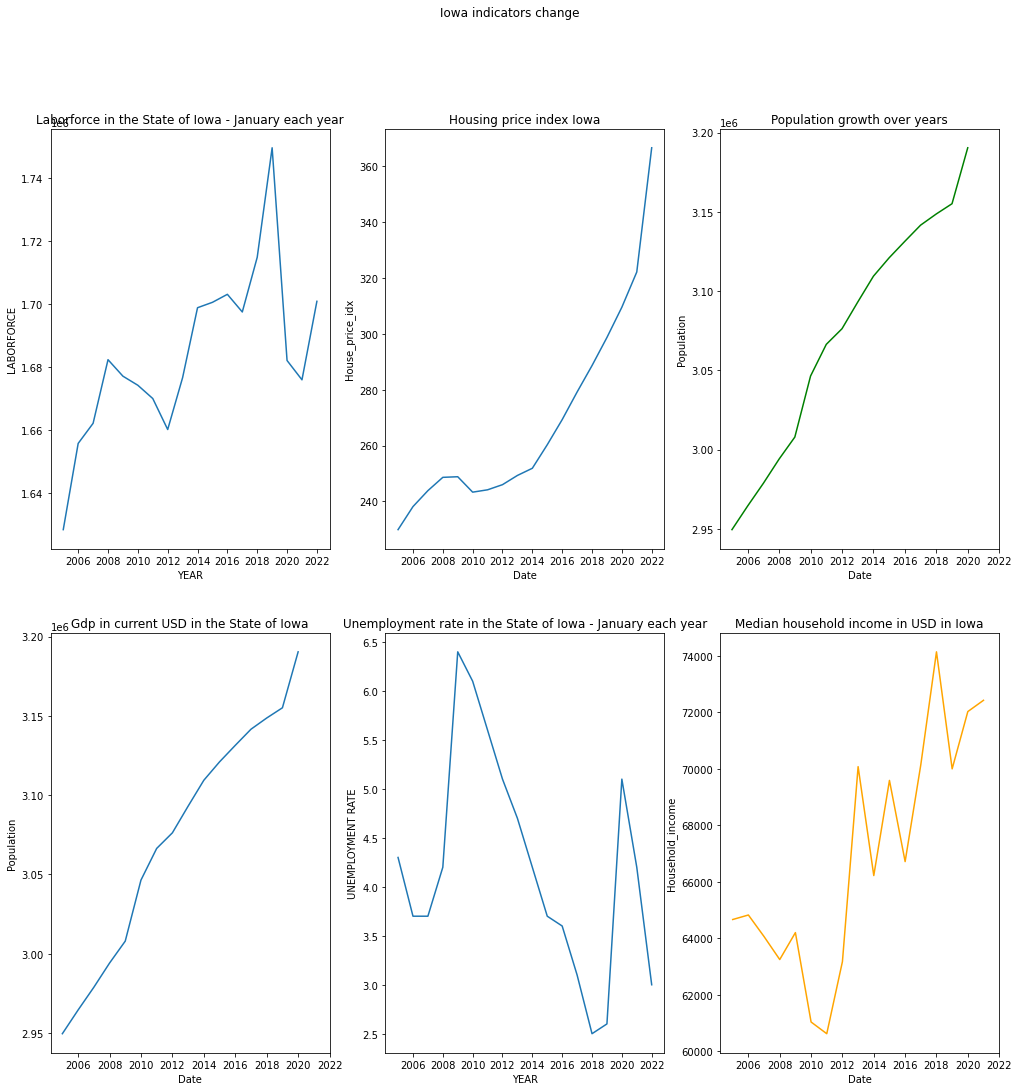

In [328]:
list_years = [2006,2008,2010,2012,2014,2016,2018,2020,2022]
fig, axes = plt.subplots(2, 3,figsize=(17, 17))
fig.suptitle('Iowa indicators change')
sns.lineplot(x='Date',y='Household_income',data=df_household_2005,ax=axes[1,2], color='orange')
axes[1,2].set_title('Median household income in USD in Iowa')
axes[1,2].set_xticks(list_years)
sns.lineplot(ax = axes[0,1],x='Date', y='House_price_idx', data=df_house_idx_2005)
axes[0,1].set_title('Housing price index Iowa')
axes[0,1].set_xticks(list_years)
sns.lineplot(ax=axes[0,2],x='Date', y='Population',data=df_pop_state, color='green')
axes[0,2].set_xticks(list_years)
axes[0,2].set_title('Population growth over years')
sns.lineplot(x='Date',y='Population',data=df_pop_state,ax=axes[1,0])
axes[1,0].set_xticks(list_years)
axes[1,0].set_title('Gdp in current USD in the State of Iowa')
sns.lineplot(x='YEAR',y='UNEMPLOYMENT RATE',data=df_labor_iowa,ax=axes[1,1])
axes[1,1].set_title('Unemployment rate in the State of Iowa - January each year')
axes[1,1].set_xticks(list_years)
sns.lineplot(x='YEAR',y='LABORFORCE',data=df_labor_iowa,ax=axes[0,0])
axes[0,0].set_xticks(list_years)
axes[0,0].set_title('Laborforce in the State of Iowa - January each year')


The above subplots provide a great overview of some of the Iowa's economic and demographic indicators.




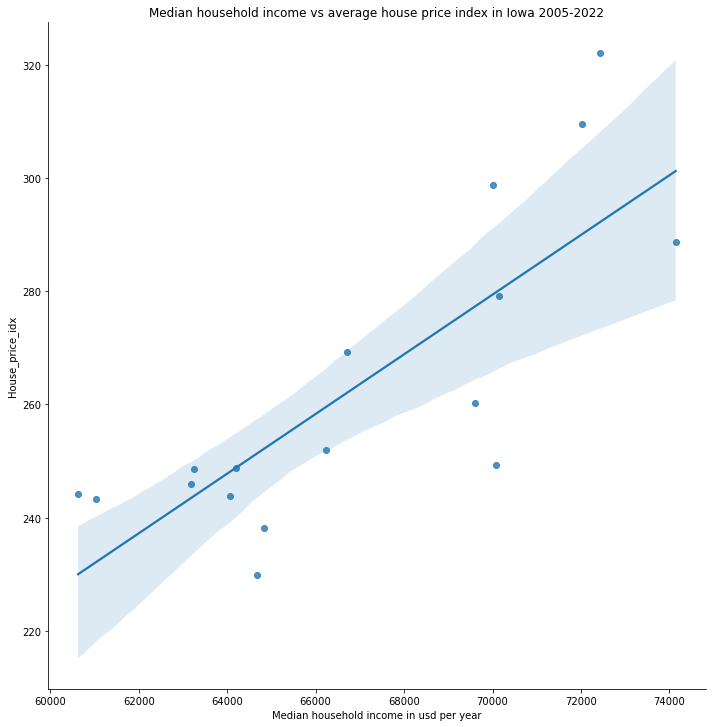

In [329]:

ax = sns.lmplot(x='Household_income',y='House_price_idx',data=df_gdp_hh_idx,height=10)
plt.title('Median household income vs average house price index in Iowa 2005-2022')
plt.xlabel('Median household income in usd per year')
plt.show()

As we can see the above variables seem to be correlated. Let's check how strong is that positive linear correlation.

In [330]:
def calc_correlation(dataset1, dataset2):
    co, pv = pearsonr(dataset1, dataset2)
    print('Correlation coefficient:', co)
    print('Significance threshold: ', pv)

In [331]:

calc_correlation(df_gdp_hh_idx['Household_income'],df_gdp_hh_idx['House_price_idx'])

Correlation coefficient: 0.8033003164265122
Significance threshold:  0.00010295870582348703


According to the correlation coefficient the linear correlation between analyzed values is high and positive. P-value < 0.05.

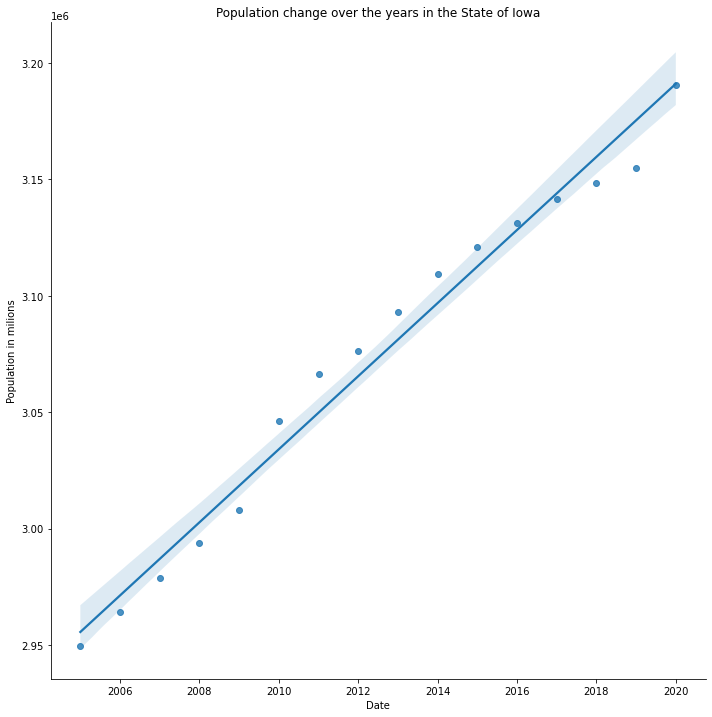

In [332]:

sns.lmplot(x='Date',y='Population',data=df_pop_state,height=10)
plt.title('Population change over the years in the State of Iowa')
plt.ylabel('Population in milions')
plt.show()

In [333]:
pop_2005 = df_pop_state.Population.where(df_pop_state.Date == 2005)

In [334]:
pop_2005 = int(pop_2005[0])

In [335]:
pop_2020 = df_pop_state.Population.where(df_pop_state.Date == 2020)

In [336]:
pop_2020 = int(pop_2020[-1:])

In [337]:
pop_difference = pop_2020 - pop_2005
ratio_g = round(pop_difference / pop_2005 * 100,1)


In [338]:
print('The population of the State of Iowa in 2005-2020 time preiod increased by ' + str(pop_difference) + ' people,\n which is equal to ' + str(ratio_g) + ' % growth in total for the 16 years.')

The population of the State of Iowa in 2005-2020 time preiod has increased by 240919 people,
 which is equal to 8.2 % growth in total for the 16 years.


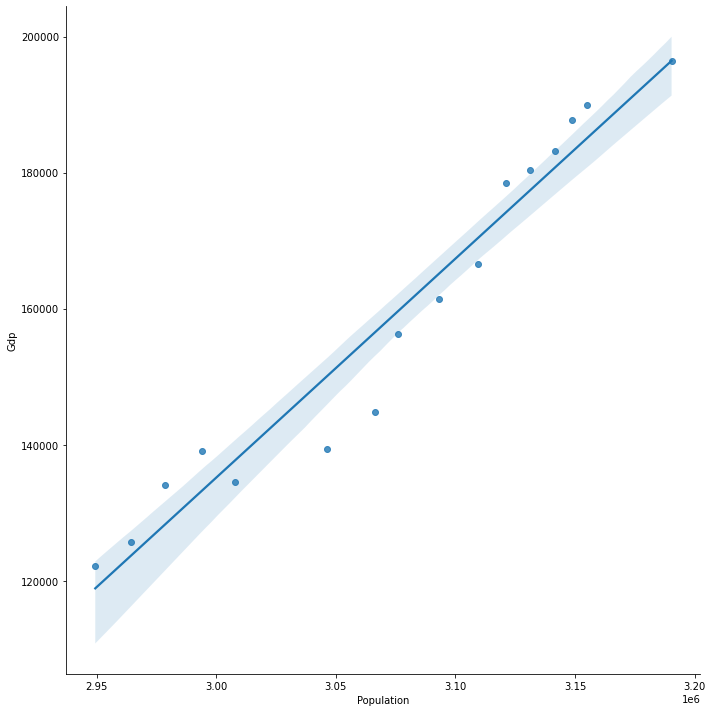

In [339]:

df_gdp_vs_pop = pd.merge(df_gdp_state,df_pop_state, on='Date')
sns.lmplot(x='Population',y='Gdp',data=df_gdp_vs_pop,height=10)
plt.show()

The following plot shows that the gdp and population change in the State are correlated.


In [340]:
calc_correlation(df_gdp_vs_pop.Population,df_gdp_vs_pop.Gdp)

Correlation coefficient: 0.9748327458431221
Significance threshold:  1.6045403039689432e-10


Correlation coefficient value close to 1 shows us that the correlation is positive and very high. P-value < 0.05.

In [341]:
df_gdp_first = df_gdp_state.Gdp.where(df_gdp_state.Date == 2005)
df_gdp_last = df_gdp_state.Gdp.where(df_gdp_state.Date == 2022)

In [342]:
df_gdp_first = int(df_gdp_first[0])
df_gdp_last = int(df_gdp_last[-1:])

In [343]:
gdp_diff = df_gdp_last - df_gdp_first
gdp_ratio = round(df_gdp_first / gdp_diff *100, 1)

In [344]:
print('In the years 2005-2022 the gdp of the State of Iowa grew by ' + str(gdp_diff) + ' milions USD equal to ' + str(gdp_ratio) + ' % growth in total over the 18 years.')

In the years 2005-2022 the gdp of the State of Iowa grew by 109421 milions USD equal to 111.7 % growth in total over the 18 years.


In [345]:
df_household_2005

,Date,Household_income
21,2005,64669
22,2006,64829
23,2007,64065
24,2008,63252
25,2009,64206
26,2010,61041
27,2011,60627
28,2012,63180
29,2013,70080
30,2014,66225


In [346]:
df_hhold_2021 = df_household_2005.Household_income.where(df_household_2005.Date == 2021)
df_hhold_2021 = int(df_hhold_2021[37])
df_hhold_2005 = df_household_2005.Household_income.where(df_household_2005.Date == 2005)
df_hhold_2005 = int(df_hhold_2005[21])
diff_hhold = int(df_hhold_2021) - int(df_hhold_2005)
ratio = round(diff_hhold / df_hhold_2005 * 100,1)
print('Median household income in the State of Iowa grew by ' + str(diff_hhold) + ' USD from 2005 to 2021, ' + str(ratio) + '% in total.')

Median household income in the State of Iowa grew by 7760 USD from 2005 to 2021, 12.0% in total.


In [347]:
df_max_gdp = df_gdp_county_diff.where(df_gdp_county_diff.Ratio == df_gdp_county_diff.Ratio.max()).dropna()
df_max_gdp

,County,Gdp_2005,Gdp_2020,difference,Ratio,growing
25,"Dallas, IA",1808416.0,5839259.0,4030843.0,222.893571,True


The fastes growing county in terms of gdp was Dallas County which experienced 222.8% growth in gdp over the 2005-2020 period.

In [348]:
df_max_pop_chg = df_pop_diff.where(df_pop_diff.Ratio == df_pop_diff.Ratio.max()).dropna()
df_max_pop_chg

,County,Population 2005,Population 2020,difference,Ratio,growing
76,Dallas County,51779.0,99678.0,47899.0,92.506615,True


County with the fastest population change over the measured period was Dallas County which had 92% population growth over the 2005-2020 period.

In [349]:
df_max_pop_grw = df_pop_diff.where(df_pop_diff.growing == True).dropna()
df_max_pop_grw = df_max_pop_grw.reset_index()
df_max_pop_grw

,index,County,Population 2005,Population 2020,difference,Ratio,growing
0,3,Wayne County,6422.0,6497.0,75.0,1.167860,True
1,9,Marshall County,39020.0,40105.0,1085.0,2.780625,True
2,11,Washington County,21037.0,22565.0,1528.0,7.263393,True
3,12,Woodbury County,101211.0,105941.0,4730.0,4.673405,True
4,14,Jones County,20303.0,20646.0,343.0,1.689406,True
5,17,Warren County,42923.0,52403.0,9480.0,22.086061,True
6,21,Madison County,14864.0,16548.0,1684.0,11.329386,True
7,25,Marion County,32310.0,33414.0,1104.0,3.416899,True
8,28,Pottawattamie County,88960.0,93667.0,4707.0,5.291142,True
9,30,Lyon County,11449.0,11934.0,485.0,4.236178,True


The county which gained the most people is the Polk County which gained 90408 people over 2005-2020 period (22.5% increase since 2005).

All 99 counties experienced gdp growth but only 34 of them experienced population growth.

Let's check the gdp per capita per county and state wise.

In [350]:
gdp_per_capita_2005 = int(df_gdp_first) * 1000000 / pop_2005
gdp_per_capita_2020 = int(df_gdp_last) * 1000000 / pop_2020
diff = round(gdp_per_capita_2020 - gdp_per_capita_2005,1)
ratio = round(diff / gdp_per_capita_2005 * 100,1)

In [351]:
print('The gdp per capita in the State of Iowa grew by ' + str(diff) + ' USD (75.2% increase since 2005) during the 2005-2020 period.')

The gdp per capita in the State of Iowa grew by 31167.8 USD (75.2% increase since 2005) during the 2005-2020 period.


In [352]:
df_gdp_county_diff.County = [i[:-4] for i in list(df_gdp_county_diff.County)]

In [353]:
df_gdp_county_diff

,County,Gdp_2005,Gdp_2020,difference,Ratio,growing
1,Adair,231854.0,471348.0,239494.0,103.295177,True
2,Adams,113445.0,225198.0,111753.0,98.508528,True
3,Allamakee,451816.0,650482.0,198666.0,43.970554,True
4,Appanoose,313599.0,422811.0,109212.0,34.825366,True
5,Audubon,171628.0,304112.0,132484.0,77.192533,True
...,...,...,...,...,...,...
95,Winnebago,327016.0,441583.0,114567.0,35.034066,True
96,Winneshiek,686874.0,1060337.0,373463.0,54.371399,True
97,Woodbury,4397495.0,5335902.0,938407.0,21.339581,True
98,Worth,167560.0,309318.0,141758.0,84.601337,True


In [354]:
df_pop_diff.County = [i[:-7] for i in list(df_pop_diff.County)]

In [355]:
df_per_capita_county = pd.merge(df_pop_diff,df_gdp_county_diff, on='County')
df_pop_diff

,County,Population 2005,Population 2020,difference,Ratio,growing
0,Mitchell,10784.0,10565.0,-219.0,-2.030786,False
1,Delaware,17619.0,17488.0,-131.0,-0.743516,False
2,Mills,14846.0,14484.0,-362.0,-2.438367,False
3,Wayne,6422.0,6497.0,75.0,1.167860,True
4,Benton,26643.0,25575.0,-1068.0,-4.008558,False
...,...,...,...,...,...,...
94,Adair,7721.0,7496.0,-225.0,-2.914130,False
95,Ida,7169.0,7005.0,-164.0,-2.287627,False
96,Buena Vista,19713.0,20823.0,1110.0,5.630802,True
97,Guthrie,11201.0,10623.0,-578.0,-5.160254,False


In [356]:
df_per_capita_county

,County,Population 2005,Population 2020,difference_x,Ratio_x,growing_x,Gdp_2005,Gdp_2020,difference_y,Ratio_y,growing_y
0,Mitchell,10784.0,10565.0,-219.0,-2.030786,False,295897.0,673893.0,377996.0,127.745803,True
1,Delaware,17619.0,17488.0,-131.0,-0.743516,False,462542.0,948969.0,486427.0,105.163855,True
2,Mills,14846.0,14484.0,-362.0,-2.438367,False,305530.0,584197.0,278667.0,91.207737,True
3,Wayne,6422.0,6497.0,75.0,1.167860,True,139268.0,252125.0,112857.0,81.035845,True
4,Benton,26643.0,25575.0,-1068.0,-4.008558,False,485434.0,990090.0,504656.0,103.959756,True
...,...,...,...,...,...,...,...,...,...,...,...
94,Adair,7721.0,7496.0,-225.0,-2.914130,False,231854.0,471348.0,239494.0,103.295177,True
95,Ida,7169.0,7005.0,-164.0,-2.287627,False,302801.0,633693.0,330892.0,109.277050,True
96,Buena Vista,19713.0,20823.0,1110.0,5.630802,True,765364.0,1283184.0,517820.0,67.656697,True
97,Guthrie,11201.0,10623.0,-578.0,-5.160254,False,316612.0,470676.0,154064.0,48.660190,True


In [357]:
df_per_capita_county = df_per_capita_county.drop(columns=['difference_x','growing_x','Ratio_x','difference_y','growing_y','Ratio_y'])

In [358]:
df_per_capita_county

,County,Population 2005,Population 2020,Gdp_2005,Gdp_2020
0,Mitchell,10784.0,10565.0,295897.0,673893.0
1,Delaware,17619.0,17488.0,462542.0,948969.0
2,Mills,14846.0,14484.0,305530.0,584197.0
3,Wayne,6422.0,6497.0,139268.0,252125.0
4,Benton,26643.0,25575.0,485434.0,990090.0
...,...,...,...,...,...
94,Adair,7721.0,7496.0,231854.0,471348.0
95,Ida,7169.0,7005.0,302801.0,633693.0
96,Buena Vista,19713.0,20823.0,765364.0,1283184.0
97,Guthrie,11201.0,10623.0,316612.0,470676.0


In [359]:
def calc_per_capita(dataset, column1, column2, new_col):
    gdp = list(dataset[column1])
    pop = list(dataset[column2])
    dataset[new_col] = [gdp[i] / pop[i] for i in range(0,len(gdp))]


In [360]:
calc_per_capita(df_per_capita_county,'Gdp_2005','Population 2005', 'gdp_per_capita_2005')

In [361]:
calc_per_capita(df_per_capita_county,'Gdp_2020','Population 2020', 'gdp_per_capita_2020')

In [362]:
df_per_capita_county

,County,Population 2005,Population 2020,Gdp_2005,Gdp_2020,gdp_per_capita_2005,gdp_per_capita_2020
0,Mitchell,10784.0,10565.0,295897.0,673893.0,27.438520,63.785424
1,Delaware,17619.0,17488.0,462542.0,948969.0,26.252455,54.264010
2,Mills,14846.0,14484.0,305530.0,584197.0,20.579954,40.333955
3,Wayne,6422.0,6497.0,139268.0,252125.0,21.686079,38.806372
4,Benton,26643.0,25575.0,485434.0,990090.0,18.219945,38.713196
...,...,...,...,...,...,...,...
94,Adair,7721.0,7496.0,231854.0,471348.0,30.029012,62.879936
95,Ida,7169.0,7005.0,302801.0,633693.0,42.237551,90.462955
96,Buena Vista,19713.0,20823.0,765364.0,1283184.0,38.825344,61.623397
97,Guthrie,11201.0,10623.0,316612.0,470676.0,28.266405,44.307258


In [363]:
def calc_diff_ratio(dataset):
    g_p_c2005 = [i for i in dataset['gdp_per_capita_2005']]
    g_p_c2020 = [i for i in dataset['gdp_per_capita_2020']]
    dataset['diff'] = [float(g_p_c2020[i]) - float(g_p_c2005[i]) for i in range(0,len(g_p_c2005))]
    diff = [i for i in dataset['diff']]
    dataset['ratio'] = [round(diff[i] / g_p_c2005[i] *100,1) for i in range(0,len(g_p_c2005))]

In [364]:
calc_diff_ratio(df_per_capita_county)

In [365]:
df_per_capita_county

,County,Population 2005,Population 2020,Gdp_2005,Gdp_2020,gdp_per_capita_2005,gdp_per_capita_2020,diff,ratio
0,Mitchell,10784.0,10565.0,295897.0,673893.0,27.438520,63.785424,36.346904,132.5
1,Delaware,17619.0,17488.0,462542.0,948969.0,26.252455,54.264010,28.011555,106.7
2,Mills,14846.0,14484.0,305530.0,584197.0,20.579954,40.333955,19.754001,96.0
3,Wayne,6422.0,6497.0,139268.0,252125.0,21.686079,38.806372,17.120293,78.9
4,Benton,26643.0,25575.0,485434.0,990090.0,18.219945,38.713196,20.493251,112.5
...,...,...,...,...,...,...,...,...,...
94,Adair,7721.0,7496.0,231854.0,471348.0,30.029012,62.879936,32.850924,109.4
95,Ida,7169.0,7005.0,302801.0,633693.0,42.237551,90.462955,48.225404,114.2
96,Buena Vista,19713.0,20823.0,765364.0,1283184.0,38.825344,61.623397,22.798054,58.7
97,Guthrie,11201.0,10623.0,316612.0,470676.0,28.266405,44.307258,16.040853,56.7


In [366]:
max_gdppc_ratio = df_per_capita_county.where(df_per_capita_county.ratio == df_per_capita_county.ratio.max()).dropna()

In [367]:
max_gdppc_ratio

,County,Population 2005,Population 2020,Gdp_2005,Gdp_2020,gdp_per_capita_2005,gdp_per_capita_2020,diff,ratio
0,Mitchell,10784.0,10565.0,295897.0,673893.0,27.43852,63.785424,36.346904,132.5


The fastest growing county in terms of gdp per capita in the 2005-2020 period was Mitchell County with 132.5% growth in gdp per capita (36346USD growth over the 16 years).

In [368]:
max_gdppc =  df_per_capita_county.where(df_per_capita_county.gdp_per_capita_2020 == df_per_capita_county.gdp_per_capita_2020.max()).dropna()

In [369]:
max_gdppc

,County,Population 2005,Population 2020,Gdp_2005,Gdp_2020,gdp_per_capita_2005,gdp_per_capita_2020,diff,ratio
48,Polk,401993.0,492401.0,27917821.0,46873133.0,69.448525,95.193009,25.744484,37.1


The County with the highest gdp per capita in 2020 was the Polk County with 95193 USD gross domestic product per capita.

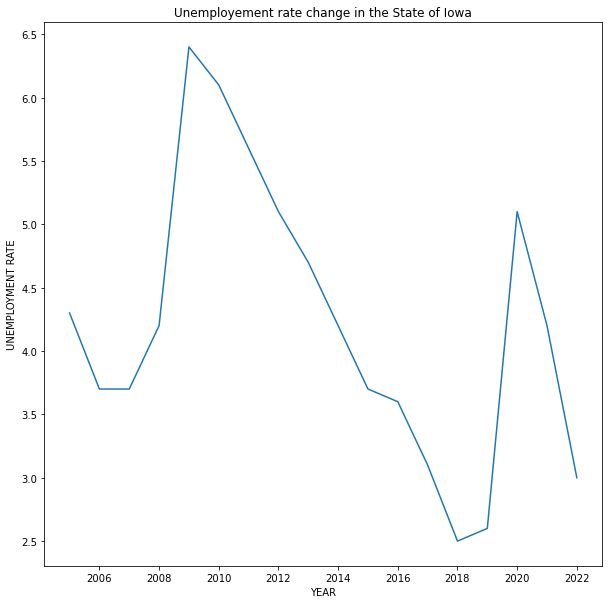

In [370]:
plt.figure(figsize=(10,10))
ax = sns.lineplot(x='YEAR',y='UNEMPLOYMENT RATE',data=df_labor_iowa)
ax.set_xticks(list_years)
plt.title('Unemployement rate change in the State of Iowa')
plt.show()

As visible above the unemployment rate did not follow any particular trend. It had it's peaks around the worldwide crisises - 2008 housing crash and 2020 covid-19 pandemic.

## CONCLUSIONS <br>
1. The population of the State of Iowa increased by 8.2% in the years 2005-2020.<br>
2. The total gdp of the State of Iowa counted in current USd increased by 111.7% in the 2005-2022 period.<br>
3. Median household income in the State of Iowa grew by 12% during 2005-2020 period<br>
4. The Dallas County experienced the fastes gdp change - 222.8% growth in years 2005-2020. The County also experienced the fastest population growth - 92% over the years.<br>
5. 34 out of 99 counties in the State Iowa experienced population growth between 2005 and 2020.<br>
6. All 99 counties in the State of Iowa experienced gdp growth between 2005 and 2020.<br>
7. The fastest growing county in terms of gdp per capita was Mitchel County with 132.5% change over 2005-2020 period.<br>
8. The gdp per capita in the State of Iowa grew by 75.2% during 2005-2020 period.<br>
9. The unemployment rate in the State of Iowa has dropped from 4.3% to 3% since 2005. However the change was not linear, spikes in unemployment rate around the finnancial crisis and covid pandemic start are visible on the line plot.